## Pair Programming - Regresión lineal 3

### Asunciones

---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../archivos/metro_A.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48187 entries, 0 to 48203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            48187 non-null  object 
 1   weekday         48187 non-null  int64  
 2   time            48187 non-null  object 
 3   holiday_cat     48187 non-null  int64  
 4   temp_c          48187 non-null  float64
 5   snow_1h         48187 non-null  float64
 6   traffic_volume  48187 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.9+ MB


In [4]:
df.head(2)

,date,weekday,time,holiday_cat,temp_c,snow_1h,traffic_volume
0,2012-10-02,2,09:00:00,0,15.13,0.0,5545
1,2012-10-02,2,10:00:00,0,16.21,0.0,4516


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
El objetivo de este pairprogramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 
- Normalidad (evaluada en el pair anterior)


Vimos que la asunción de normalidad sobre nuestra variable respuesta "traffic_volume" nos indica que nuestros datos no son normales, aceptando la H0.

- Cada asunción la deberéis testar de forma visual y analítica.

___

### Homocedasticidad de varianzas


Empezamos sacando las gráficas para ver la homogeneidad, la columna "date_time" la obviaremos, dado que no tiene mucho sentido, ya que aunque es de tipo object tiene más de 40000 registros únicos.

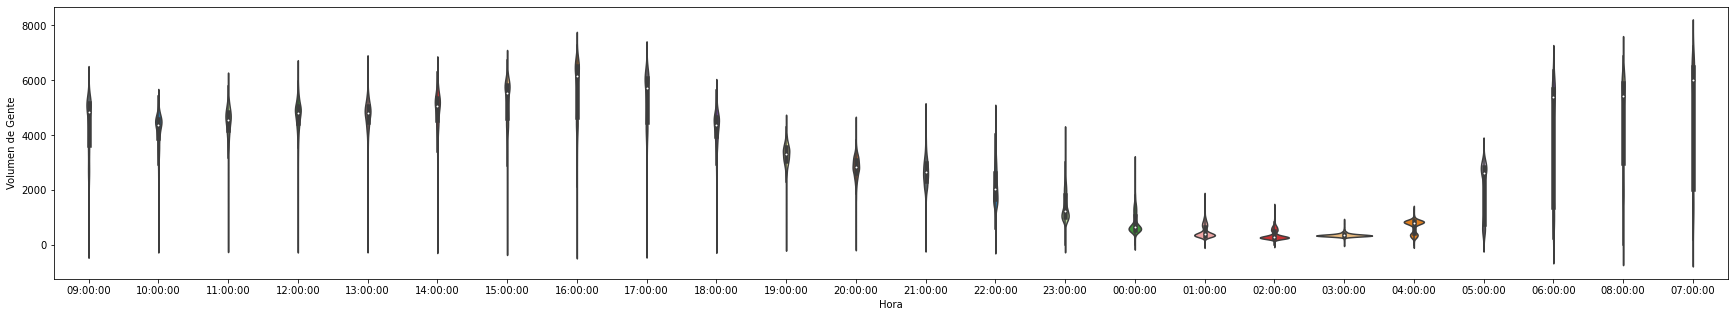

In [10]:
plt.figure( figsize=(30,5))

sns.violinplot(x= "time", y= "traffic_volume", data=df, palette="Paired")
plt.ylabel("Volumen de Gente")
plt.xlabel("Hora");


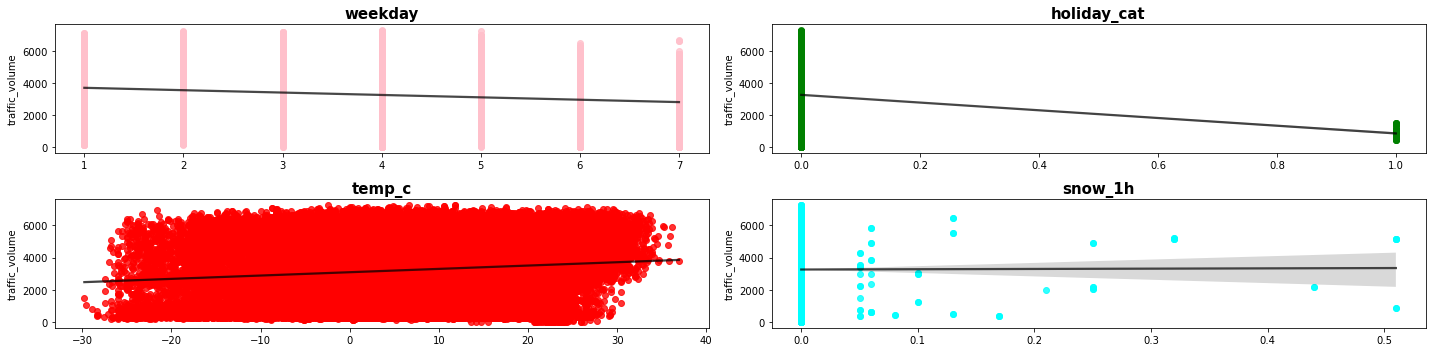

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))

lista_colores = ["pink", "green", "cyan", "magenta"]

axes = axes.flat


columnas_numeric = df.select_dtypes(include = np.number).drop('traffic_volume', axis=1)
columnas_numeric = columnas_numeric.columns


for i, colum in enumerate(columnas_numeric): 
    sns.regplot(data = df, x = colum, y = 'traffic_volume', color = lista_colores[i], line_kws = {"color": "black", "alpha": 0.7 }, ax = axes[i])
    
   
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 10)

    axes[i].set_xlabel("")

fig.tight_layout();

Creemos que hay cierta homocedasticidad en las variables de "weekday" y "holiday_cat" y heterocedasticidad en las variables restantes.

In [15]:
festivo = df[df["holiday_cat"]== 1]["traffic_volume"]
no_festivo =df[df["holiday_cat"]== 0]["traffic_volume"]

In [16]:
# Usaremos test levene para la parte analítica de la varianza, ya que nuestros datos no se distribuyen de manera normal.

levene_test = stats.levene(festivo, no_festivo)
levene_test

LeveneResult(statistic=149.92684277246298, pvalue=2.0237966542201124e-34)

El p-valor es < 0.05, rechazamos la H0, por tanto nuestra varianza en la variable "holiday_cat" es heterocedática.

In [17]:
lunes = df[df["weekday"]== 1]["traffic_volume"]
martes = df[df["weekday"]== 2]["traffic_volume"]
miercoles = df[df["weekday"]== 3]["traffic_volume"]
jueves = df[df["weekday"]== 4]["traffic_volume"]
viernes = df[df["weekday"]== 5]["traffic_volume"]
sabado = df[df["weekday"]== 6]["traffic_volume"]
domingo = df[df["weekday"]== 7]["traffic_volume"]


In [18]:
levene_test = stats.levene(lunes,martes,miercoles,jueves,viernes,sabado,domingo)
levene_test

LeveneResult(statistic=318.2927542402672, pvalue=0.0)

El p-valor es < 0.05, rechazamos la H0, por tanto nuestra varianza en la variable "weekday" es heterocedática.

___

### Independencia de las variables


In [19]:
crosstab, test_results, expected = rp.crosstab(df["holiday_cat"], df["weekday"], test= "chi-square", expected_freqs= True, prop= "cell")


In [20]:
crosstab.head()

weekday                                                  
weekday           1      2      3      4      5      6      7     All
holiday_cat                                                          
0             14.60  14.20  14.36  14.12  14.16  14.17  14.26   99.87
1              0.07   0.01   0.01   0.02   0.01   0.00   0.00    0.13
All           14.67  14.20  14.37  14.14  14.17  14.17  14.26  100.00

In [21]:
expected

weekday                                                     \
weekday               1           2            3            4            5   
holiday_cat                                                                  
0            7062.04881  6835.33617  6917.232366  6807.371615  6821.353892   
1               8.95119     8.66383     8.767634     8.628385     8.646108   

                                       
weekday                6            7  
holiday_cat                            
0            6821.353892  6861.303256  
1               8.646108     8.696744

In [22]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,107.6380
1,p-value =,0.0000
2,Cramer's V =,0.0473


Dado que el p-valor es menor de 0.05 , las variables comparadas son dependientes ya que rechazamos la H0

In [23]:
crosstab, test_results, expected = rp.crosstab(df["holiday_cat"], df["temp_c"], test= "chi-square", expected_freqs= True, prop= "cell")

In [24]:
crosstab

temp_c                                         \
temp_c      -29.75999999999999 -29.529999999999973 -28.92999999999998   
holiday_cat                                                             
0                          0.0                 0.0                0.0   
1                          0.0                 0.0                0.0   
All                        0.0                 0.0                0.0   

                                                                        \
temp_c      -28.329999999999984 -28.25999999999999 -27.529999999999973   
holiday_cat                                                              
0                          0.01                0.0                 0.0   
1                          0.00                0.0                 0.0   
All                        0.01                0.0                 0.0   

                                                                       \
temp_c      -27.44999999999999 -27.109999999999985 -26.99999999999997   
holiday_cat                                                             
0                         0.01                 0.0                0.0   
1                         0.00                 0.0                0.0   
All                       0.01                 0.0                0.0   

                                 ...                                      \
temp_c      -26.889999999999983  ... 34.54000000000002 34.72000000000003   
holiday_cat                      ...                                       
0                           0.0  ...               0.0               0.0   
1                           0.0  ...               0.0               0.0   
All                         0.0  ...               0.0               0.0   

                                                                   \
temp_c      35.09000000000003 35.28000000000003 35.72000000000003   
holiday_cat                                                         
0                         0.0               0.0               0.0   
1                         0.0               0.0               0.0   
All                       0.0               0.0               0.0   

                                                                   \
temp_c      35.80000000000001 35.93000000000001 36.14000000000004   
holiday_cat                                                         
0                         0.0               0.0               0.0   
1                         0.0               0.0               0.0   
All                       0.0               0.0               0.0   

                                        
temp_c      36.920000000000016     All  
holiday_cat                             
0                          0.0   99.87  
1                          0.0    0.13  
All                        0.0  100.00  

[3 rows x 5843 columns]

In [25]:
expected

temp_c                                                    \
temp_c         -29.76    -29.53    -28.93    -28.33    -28.26    -27.53   
holiday_cat                                                               
0            0.998734  0.998734  0.998734  2.996202  0.998734  0.998734   
1            0.001266  0.001266  0.001266  0.003798  0.001266  0.001266   

                                                     ...                      \
temp_c         -27.45    -27.11    -27.00    -26.89  ...     34.53     34.54   
holiday_cat                                          ...                       
0            2.996202  0.998734  1.997468  0.998734  ...  0.998734  0.998734   
1            0.003798  0.001266  0.002532  0.001266  ...  0.001266  0.001266   

                                                                         \
temp_c          34.72     35.09     35.28     35.72     35.80     35.93   
holiday_cat                                                               
0            0.998734  0.998734  0.998734  0.998734  0.998734  0.998734   
1            0.001266  0.001266  0.001266  0.001266  0.001266  0.001266   

                                 
temp_c          36.14     36.92  
holiday_cat                      
0            0.998734  0.998734  
1            0.001266  0.001266  

[2 rows x 5842 columns]

In [26]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 5841.0) =,6082.5258
1,p-value =,0.0135
2,Cramer's V =,0.3553


Obviamente el p-valor es menor de 0.05 y por tanto rechazamos H0, lo que quiere decir que las variables de "holiday_cat" y "temp_c" son dependientes.